## **PROJECT DATA MINING**
## Topic: Unlocking Key Data Insights to Drive Bicycle Sales
### MEMBER:
1. Andreas Nicolas Ginting 412022021
2. Kenrick Wijaya 412022016
3. Michael William 412022019
4. Joe Tionata 412022012




## Importing Libraries

In [ ]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O
import os
import sqlite3 as sql
import matplotlib.pyplot as plt
from datetime import datetime
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

url_base = "https://raw.githubusercontent.com/andrsginting/bike-store-dataset/refs/heads/main"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Creating dataframes for csv files

> Add blockquote



In [ ]:
brands = pd.read_csv(f"{url_base}/brands.csv")
categories = pd.read_csv(f"{url_base}/categories.csv")
customers = pd.read_csv(f"{url_base}/customers.csv")
order_items = pd.read_csv(f"{url_base}/order_items.csv")
orders = pd.read_csv(f"{url_base}/orders.csv")
products = pd.read_csv(f"{url_base}/products.csv")
staffs = pd.read_csv(f"{url_base}/staffs.csv")
stocks = pd.read_csv(f"{url_base}/stocks.csv")
stores = pd.read_csv(f"{url_base}/stores.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Creating a connection to new sqlite DB

---



In [ ]:
db = sql.connect("bike_store.db")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Creating Tables for all dataframes




In [ ]:
brands.to_sql("brands", db, if_exists = 'replace', index = 'False')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9

## Save Dataframes to Database

In [ ]:
print("Number of rows in categories: ", categories.to_sql("categories", db, if_exists = 'replace', index = 'False'))
print("Number of rows in customers: ", customers.to_sql("customers", db, if_exists = 'replace', index = 'False'))
print("Number of rows in order_items: ", order_items.to_sql("order_items", db, if_exists = 'replace', index = 'False'))
print("Number of rows in orders: ", orders.to_sql("orders", db, if_exists = 'replace', index = 'False'))
print("Number of rows in products: ", products.to_sql("products", db, if_exists = 'replace', index = 'False'))
print("Number of rows in staffs: ", staffs.to_sql("staffs", db, if_exists = 'replace', index = 'False'))
print("Number of rows in stocks: ", stocks.to_sql("stocks", db, if_exists = 'replace', index = 'False'))
print("Number of rows in stores: ", stores.to_sql("stores", db, if_exists = 'replace', index = 'False'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of rows in categories:  7
Number of rows in customers:  1445
Number of rows in order_items:  4722
Number of rows in orders:  1615
Number of rows in products:  321
Number of rows in staffs:  10
Number of rows in stocks:  939
Number of rows in stores:  3


***Showing table brands***

In [ ]:
q1 = """
select * from brands
"""
pd.read_sql(q1, db)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,False,brand_id,brand_name
0,0,1,Electra
1,1,2,Haro
2,2,3,Heller
3,3,4,Pure Cycles
4,4,5,Ritchey
5,5,6,Strider
6,6,7,Sun Bicycles
7,7,8,Surly
8,8,9,Trek


***Showing table categories***

In [ ]:
q1 = """
select * from categories
"""
pd.read_sql(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,False,category_id,category_name
0,0,1,Children Bicycles
1,1,2,Comfort Bicycles
2,2,3,Cruisers Bicycles
3,3,4,Cyclocross Bicycles
4,4,5,Electric Bikes
5,5,6,Mountain Bikes
6,6,7,Road Bikes


### DATA INSIGHT DENGAN ALGORITMA FP GROWTH
***Kombinasi 2 Produk Terlaris dibeli Konsumen***

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate  # Pastikan Anda menginstalnya dengan `pip install tabulate`

# Mengambil data dari tabel order_items dan products
query_order_items = """
SELECT order_id, product_id
FROM order_items
"""
query_products = """
SELECT product_id, product_name
FROM products
"""
df_order_items = pd.read_sql(query_order_items, db)
df_products = pd.read_sql(query_products, db)

# Mengelompokkan product_id berdasarkan order_id menjadi list transaksi
transactions = df_order_items.groupby('order_id')['product_id'].apply(list).values.tolist()

# Menggunakan TransactionEncoder untuk mengubah data ke format yang sesuai
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Menjalankan algoritma FP-Growth
frequent_itemsets = fpgrowth(df_transactions, min_support=0.005, use_colnames=True)

# Filter hasil untuk mendapatkan kombinasi produk dengan panjang 2
frequent_itemsets_2_items = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

# Urutkan berdasarkan nilai support dari yang terbesar
frequent_itemsets_2_items = frequent_itemsets_2_items.sort_values(by='support', ascending=False)

# Menambahkan kolom nama produk ke hasil itemset
def map_product_names(itemset):
    return [df_products[df_products['product_id'] == int(item)]['product_name'].values[0] for item in itemset]

if not frequent_itemsets_2_items.empty:
    # Tambahkan kolom dengan nama produk ke DataFrame hasil
    frequent_itemsets_2_items['product_names'] = frequent_itemsets_2_items['itemsets'].apply(map_product_names)

    # Atur ulang urutan kolom agar 'product_names' berada di sebelah kanan kolom lainnya
    frequent_itemsets_2_items = frequent_itemsets_2_items[['support', 'itemsets', 'product_names']]

    # Cetak hasil dalam bentuk tabel
    print("Kombinasi produk yang paling sering dibeli bersama:")
    print(tabulate(frequent_itemsets_2_items, headers="keys", tablefmt="pretty"))
else:
    print("Tidak ada kombinasi produk dengan panjang 2 yang memenuhi syarat support.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kombinasi produk yang paling sering dibeli bersama:
+-----+----------------------+---------------------+----------------------------------------------------------------------------------------------------+
|     |       support        |      itemsets       |                                           product_names                                            |
+-----+----------------------+---------------------+----------------------------------------------------------------------------------------------------+
| 178 | 0.009287925696594427 | frozenset({5, 14})  |         ['Heller Shagamaw Frame - 2016', "Electra Girl's Hawaii 1 (16-inch) - 2015/2016"]          |
| 179 |  0.0086687306501548  | frozenset({9, 11})  |                      ['Trek Conduit+ - 2016', 'Surly Straggler 650b - 2016']                       |
| 184 |  0.0086687306501548  | frozenset({12, 13}) |            ['Electra Townie Original 21D - 2016', 'Electra Cruiser 1 (24-Inch) - 2016']            |
| 193 |  0.0086687306501

### DATA INSIGHT DENGAN ALGORITMA FP GROWTH
***Kombinasi 3 Produk Terlaris dibeli Konsumen***



In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate  # Pastikan Anda menginstalnya dengan `pip install tabulate`

# Mengambil data dari tabel order_items dan products
query_order_items = """
SELECT order_id, product_id
FROM order_items
"""
query_products = """
SELECT product_id, product_name
FROM products
"""
df_order_items = pd.read_sql(query_order_items, db)
df_products = pd.read_sql(query_products, db)

# Mengelompokkan product_id berdasarkan order_id menjadi list transaksi
transactions = df_order_items.groupby('order_id')['product_id'].apply(list).values.tolist()

# Menggunakan TransactionEncoder untuk mengubah data ke format yang sesuai
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Menjalankan algoritma FP-Growth
frequent_itemsets = fpgrowth(df_transactions, min_support=0.001, use_colnames=True)

# Filter hasil untuk mendapatkan kombinasi produk dengan panjang 3
frequent_itemsets_3_items = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]

# Urutkan berdasarkan nilai support dari yang terbesar
frequent_itemsets_3_items = frequent_itemsets_3_items.sort_values(by='support', ascending=False)

# Menambahkan kolom nama produk ke hasil itemset
def map_product_names(itemset):
    return [df_products[df_products['product_id'] == int(item)]['product_name'].values[0] for item in itemset]

if not frequent_itemsets_3_items.empty:
    # Tambahkan kolom dengan nama produk ke DataFrame hasil
    frequent_itemsets_3_items['product_names'] = frequent_itemsets_3_items['itemsets'].apply(map_product_names)

    # Atur ulang urutan kolom agar 'product_names' berada di sebelah kanan
    frequent_itemsets_3_items = frequent_itemsets_3_items[['support', 'itemsets', 'product_names']]

    # Cetak hasil dalam bentuk tabel
    print("Kombinasi produk (3 produk) yang paling sering dibeli bersama:")
    print(tabulate(frequent_itemsets_3_items, headers="keys", tablefmt="pretty"))
else:
    print("Tidak ada kombinasi produk dengan panjang 3 yang memenuhi syarat support.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kombinasi produk (3 produk) yang paling sering dibeli bersama:
+------+-----------------------+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|      |        support        |         itemsets         |                                                                    product_names                                                                    |
+------+-----------------------+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
| 427  | 0.002476780185758514  |  frozenset({3, 12, 6})   |                 ['Surly Wednesday Frameset - 2016', 'Electra Townie Original 21D - 2016', 'Surly Ice Cream Truck Frameset - 2016']                  |
| 402  | 0.002476780185758514  |  frozenset({3, 20, 6})   |           ['Surly Wednesday Frameset 

**Analisis Penjualan Berdasarkan Kategori Produk**

***Tujuan: Mengidentifikasi kategori produk dengan penjualan tertinggi.***


In [ ]:
# Query untuk mendapatkan total penjualan per kategori
query = """
SELECT c.category_name, SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_sales DESC
"""
df_category_sales = pd.read_sql(query, db)

# Menampilkan hasil
print("Penjualan berdasarkan kategori produk:")
print(df_category_sales)

# Kesimpulan otomatis
if not df_category_sales.empty:
    top_category = df_category_sales.iloc[0]
    print(f"\nKesimpulan: Kategori produk dengan penjualan tertinggi adalah '{top_category['category_name']}'"
          f" dengan total penjualan sebesar {top_category['total_sales']:.2f}.")
else:
    print("\nKesimpulan: Tidak ada data penjualan yang tersedia untuk kategori produk.")


Penjualan berdasarkan kategori produk:
         category_name   total_sales
0       Mountain Bikes  2.715080e+06
1           Road Bikes  1.665098e+06
2    Cruisers Bicycles  9.950326e+05
3       Electric Bikes  9.166848e+05
4  Cyclocross Bicycles  7.110118e+05
5     Comfort Bicycles  3.940201e+05
6    Children Bicycles  2.921892e+05

Kesimpulan: Kategori produk dengan penjualan tertinggi adalah 'Mountain Bikes' dengan total penjualan sebesar 2715079.53.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Analisis Performa Penjualan Berdasarkan Lokasi Toko**

***Tujuan: Mengidentifikasi toko mana (berdasarkan lokasi) yang memiliki performa penjualan terbaik.***


In [ ]:
# Query untuk mendapatkan total penjualan per toko
query = """
SELECT s.store_name, s.city, s.state, SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_id, s.store_name, s.city, s.state
ORDER BY total_sales DESC
"""
df_store_sales = pd.read_sql(query, db)

# Menampilkan hasil
print("Performa penjualan berdasarkan lokasi toko:")
print(df_store_sales)

# Kesimpulan otomatis
if not df_store_sales.empty:
    top_store = df_store_sales.iloc[0]
    print(f"\nKesimpulan: Toko dengan penjualan tertinggi adalah '{top_store['store_name']}'"
          f" yang berlokasi di {top_store['city']}, {top_store['state']},"
          f" dengan total penjualan sebesar {top_store['total_sales']:.2f}.")
else:
    print("\nKesimpulan: Tidak ada data penjualan yang tersedia untuk lokasi toko.")


Performa penjualan berdasarkan lokasi toko:
         store_name        city state   total_sales
0     Baldwin Bikes     Baldwin    NY  5.215751e+06
1  Santa Cruz Bikes  Santa Cruz    CA  1.605823e+06
2     Rowlett Bikes     Rowlett    TX  8.675422e+05

Kesimpulan: Toko dengan penjualan tertinggi adalah 'Baldwin Bikes' yang berlokasi di Baldwin, NY, dengan total penjualan sebesar 5215751.28.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Analisis Diskon Terhadap Total Penjualan**

***Tujuan: Menentukan tingkat diskon yang efektif dalam meningkatkan total penjualan.***


In [ ]:
# Query untuk menganalisis pengaruh diskon terhadap total penjualan
query = """
SELECT ROUND(oi.discount * 100, 0) AS discount_percentage,
       SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
GROUP BY discount_percentage
ORDER BY total_sales DESC
"""
df_discount_analysis = pd.read_sql(query, db)

# Menampilkan hasil
print("Pengaruh diskon terhadap total penjualan:")
print(df_discount_analysis)

# Kesimpulan otomatis
if not df_discount_analysis.empty:
    top_discount = df_discount_analysis.iloc[0]
    print(f"\nKesimpulan: Tingkat diskon paling efektif dalam meningkatkan total penjualan adalah {top_discount['discount_percentage']}%"
          f" dengan total penjualan sebesar {top_discount['total_sales']:.2f}.")
else:
    print("\nKesimpulan: Tidak ada data penjualan yang tersedia terkait diskon.")


Pengaruh diskon terhadap total penjualan:
   discount_percentage   total_sales
0                  5.0  2.138329e+06
1                  7.0  2.026738e+06
2                 10.0  1.844883e+06
3                 20.0  1.679166e+06

Kesimpulan: Tingkat diskon paling efektif dalam meningkatkan total penjualan adalah 5.0% dengan total penjualan sebesar 2138329.44.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Pertanyaan Untuk Menggali Insight Data**

### Q1: Ambil jumlah pesanan yang dilakukan oleh setiap pelanggan. Tampilkan kolom Nama Depan, Nama Belakang, dan Jumlah Pesanan.###

In [ ]:
q1 = """
select first_name, last_name, count(order_id)
from orders ord
join customers cust
on ord.customer_id = cust.customer_id
group by ord.customer_id
"""
pd.read_sql_query(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,first_name,last_name,count(order_id)
0,Debra,Burks,3
1,Kasha,Todd,3
2,Tameka,Fisher,3
3,Daryl,Spence,3
4,Charolette,Rice,3
...,...,...,...
1440,Jamaal,Morrison,1
1441,Cassie,Cline,1
1442,Lezlie,Lamb,1
1443,Ivette,Estes,1


### **Q: Jumlah stok berdasarkan nama kategori dan nama toko**

In [ ]:
q1 = """
select
sto.store_name,
cat.category_name,
sum(quantity) as total
from
stocks st
join products prod on st.product_id = prod.product_id
join categories cat on prod.category_id = cat.category_id
join stores sto on sto.store_id = st.store_id
group by store_name, category_name

"""

result = pd.read_sql_query(q1, db)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_name,category_name,total
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


In [ ]:
# Menyimpan tabel hasil dalam SQL
result.to_sql("result", db, if_exists = "replace", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21

In [ ]:
# Nama toko yang unik dari hasil
q1 = """
select distinct store_name
from result
"""
pd.read_sql_query(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_name
0,Baldwin Bikes
1,Rowlett Bikes
2,Santa Cruz Bikes


## Heatmap Penjualan Berdasarkan Kategori dan Lokasi Toko
**Tujuan: Memvisualisasikan distribusi penjualan kategori produk pada berbagai lokasi toko.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


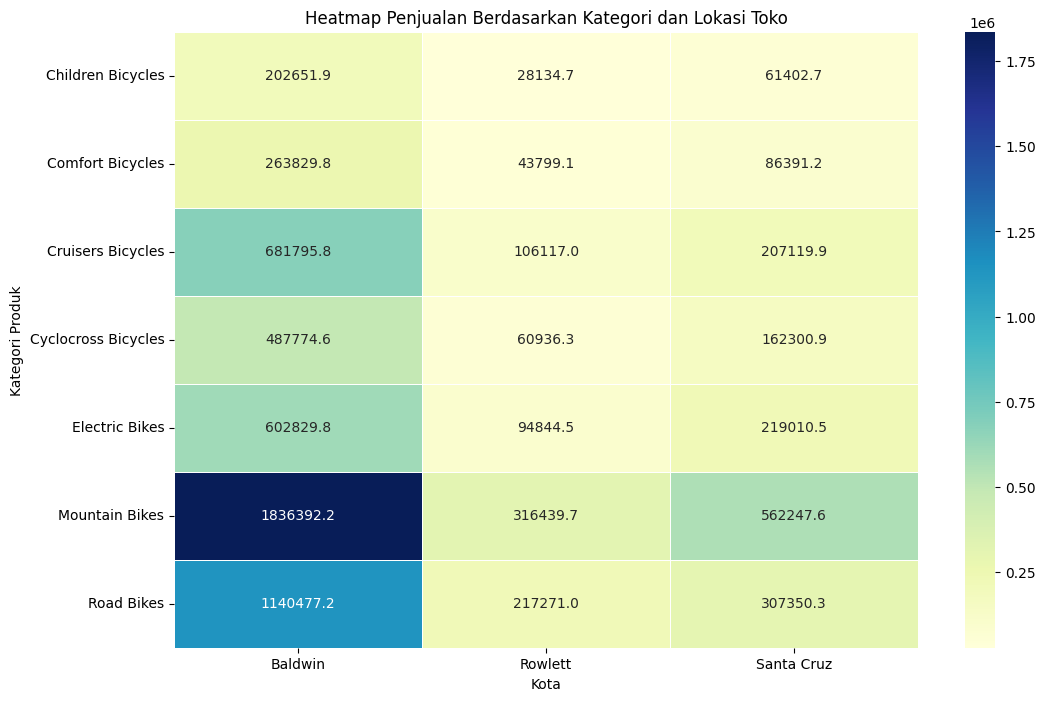

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query untuk mendapatkan total penjualan berdasarkan kategori dan lokasi toko
query = """
SELECT c.category_name, s.city, SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY c.category_name, s.city
"""
df_heatmap = pd.read_sql(query, db)

# Pivot table untuk visualisasi heatmap
heatmap_data = df_heatmap.pivot(index="category_name", columns="city", values="total_sales").fillna(0)

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap Penjualan Berdasarkan Kategori dan Lokasi Toko")
plt.ylabel("Kategori Produk")
plt.xlabel("Kota")
plt.show()



## Scatterplot Pengaruh Diskon terhadap Total Penjualan
**Tujuan: Memvisualisasikan bagaimana tingkat diskon memengaruhi total penjualan untuk memahami hubungan antara keduanya.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


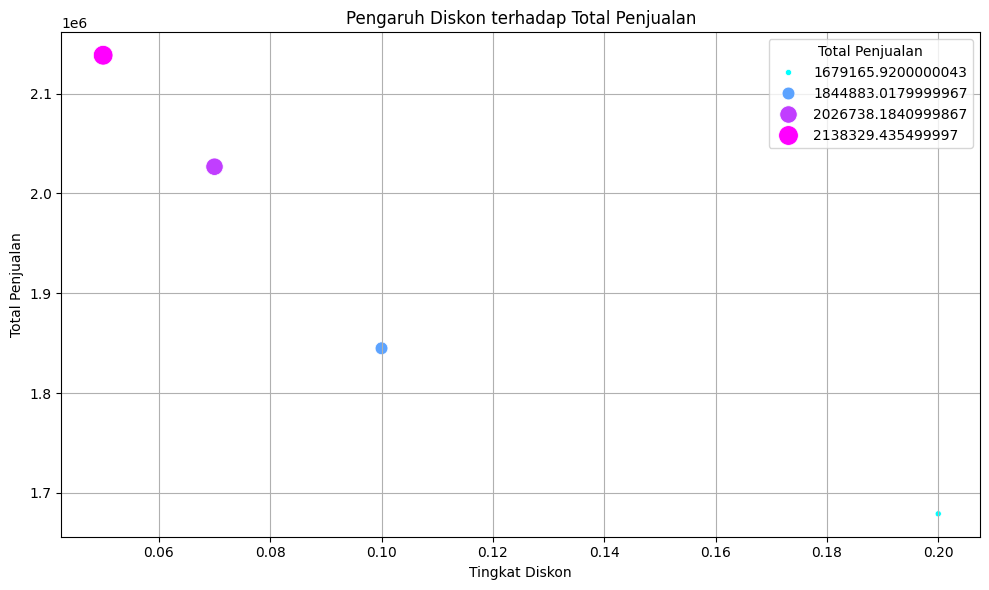

In [ ]:
# Query untuk mendapatkan pengaruh diskon terhadap total penjualan
query = """
SELECT oi.discount, SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
GROUP BY oi.discount
"""
df_scatter = pd.read_sql(query, db)

# Membuat scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x="discount", y="total_sales", size="total_sales", hue="total_sales", palette="cool", sizes=(20, 200))
plt.title("Pengaruh Diskon terhadap Total Penjualan")
plt.xlabel("Tingkat Diskon")
plt.ylabel("Total Penjualan")
plt.grid(True)
plt.legend(title="Total Penjualan", loc="upper right")
plt.tight_layout()
plt.show()


## Bar Chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


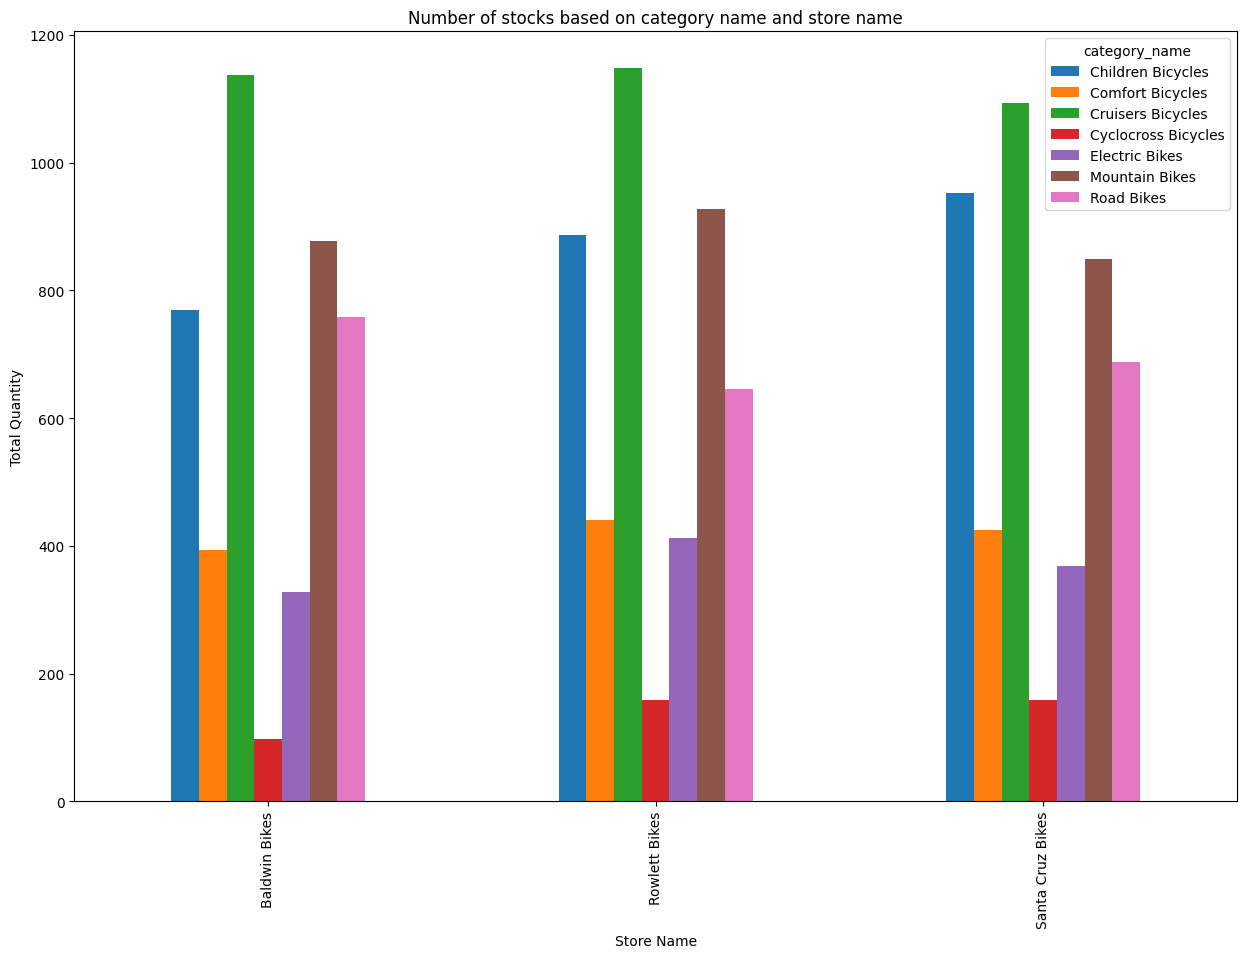

In [ ]:
result1 = result.groupby(['store_name', 'category_name'])['total'].sum().unstack().fillna(0)
result1.plot(kind = 'bar', figsize = (15, 10))
plt.title("Number of stocks based on category name and store name")
plt.xlabel("Store Name")
plt.ylabel("Total Quantity")
plt.show()

### **Q: Jumlah item pesanan berdasarkan nama kategori dan nama toko**


In [ ]:
q1 = '''
select
store_name,
category_name,
sum(quantity) as total_order_items
from
order_items oi
join orders o on o.order_id = oi.order_id
join stores st on st.store_id = o.store_id
join products prod on prod.product_id = oi.product_id
join categories cat on cat.category_id = prod.category_id
group by store_name, category_name
'''
num_order_items_result = pd.read_sql_query(q1, db)
num_order_items_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_name,category_name,total_order_items
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
2,Baldwin Bikes,Cruisers Bicycles,1396
3,Baldwin Bikes,Cyclocross Bicycles,271
4,Baldwin Bikes,Electric Bikes,202
5,Baldwin Bikes,Mountain Bikes,1170
6,Baldwin Bikes,Road Bikes,374
7,Rowlett Bikes,Children Bicycles,117
8,Rowlett Bikes,Comfort Bicycles,87
9,Rowlett Bikes,Cruisers Bicycles,245


## Bar Chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


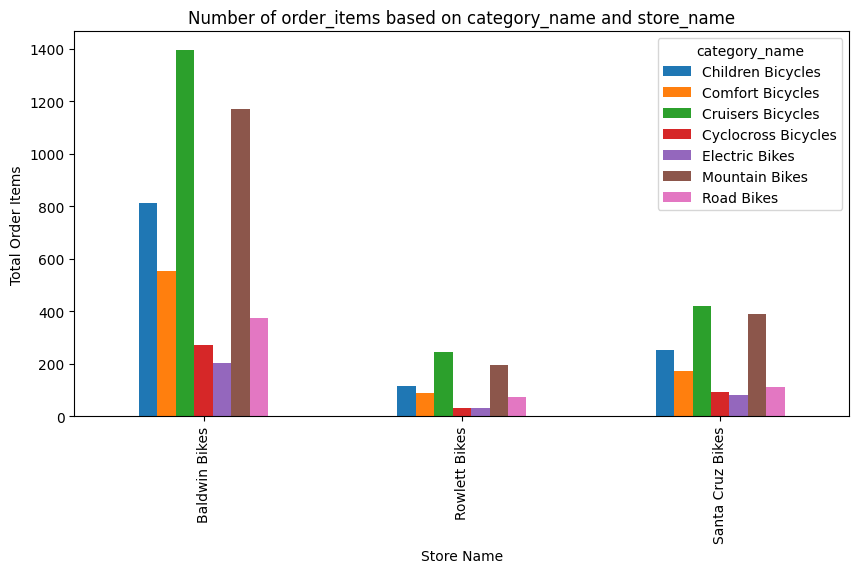

In [ ]:
# Storing results into db
num_order_items_result.to_sql("num_order_items_result", db, if_exists = "replace", index = False)
# Draw bar chart
num_order_items_result1 = num_order_items_result.groupby(['store_name','category_name'])['total_order_items'].sum().unstack().fillna(0)
num_order_items_result1.plot(kind = 'bar', figsize = (10,5))
plt.title("Number of order_items based on category_name and store_name")
plt.xlabel("Store Name")
plt.ylabel("Total Order Items")
plt.show()

### **Q: Jumlah maksimum item pesanan berdasarkan nama kategori dan nama toko**


In [ ]:
q1 = '''
select
store_name,
category_name,
sum(quantity) as total_order_items
from
order_items oi
join orders o on o.order_id = oi.order_id
join stores st on st.store_id = o.store_id
join products prod on prod.product_id = oi.product_id
join categories cat on cat.category_id = prod.category_id
group by store_name, category_name
order by total_order_items desc
'''
max_num_order_items_result = pd.read_sql_query(q1, db)
max_num_order_items_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_name,category_name,total_order_items
0,Baldwin Bikes,Cruisers Bicycles,1396
1,Baldwin Bikes,Mountain Bikes,1170
2,Baldwin Bikes,Children Bicycles,811
3,Baldwin Bikes,Comfort Bicycles,555
4,Santa Cruz Bikes,Cruisers Bicycles,422
5,Santa Cruz Bikes,Mountain Bikes,388
6,Baldwin Bikes,Road Bikes,374
7,Baldwin Bikes,Cyclocross Bicycles,271
8,Santa Cruz Bikes,Children Bicycles,251
9,Rowlett Bikes,Cruisers Bicycles,245


In [ ]:
# ATAU
num_order_items_result.sort_values(by="total_order_items", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,store_name,category_name,total_order_items
2,Baldwin Bikes,Cruisers Bicycles,1396
5,Baldwin Bikes,Mountain Bikes,1170
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
16,Santa Cruz Bikes,Cruisers Bicycles,422
19,Santa Cruz Bikes,Mountain Bikes,388
6,Baldwin Bikes,Road Bikes,374
3,Baldwin Bikes,Cyclocross Bicycles,271
14,Santa Cruz Bikes,Children Bicycles,251
9,Rowlett Bikes,Cruisers Bicycles,245


### **Q: Total penjualan di toko Santa Cruz Bikes berdasarkan tahun dan bulan**

In [ ]:
q1 = '''
select
STRFTIME('%Y',o.order_date) as Year,
STRFTIME('%m',o.order_date) as Month,
sum((quantity * list_price)-discount) as total_sales_amount
from orders o
join order_items oi on oi.order_id = o.order_id
join stores st on st.store_id = o.store_id
where
lower(st.store_name) like ('%santa cruz bikes%')
group by STRFTIME('%Y',o.order_date), STRFTIME('%m',o.order_date)

'''

pd.read_sql_query(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Month,total_sales_amount
0,2016,01,80491.49
1,2016,02,39361.16
2,2016,03,51401.51
3,2016,04,37393.70
4,2016,05,30950.07
5,2016,06,45531.76
6,2016,07,23451.76
7,2016,08,49999.56
8,2016,09,72389.70
9,2016,10,77640.26


In [ ]:
# Alternatif
q1 = '''
select
STRFTIME('%Y %m',o.order_date) as Year_Month,
sum((quantity * list_price)-discount) as total_sales_amount
from orders o
join order_items oi on oi.order_id = o.order_id
join stores st on st.store_id = o.store_id
where
lower(st.store_name) like ('%santa cruz bikes%')
group by STRFTIME('%Y %m',o.order_date)

'''

total_sales_result = pd.read_sql_query(q1, db)
total_sales_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year_Month,total_sales_amount
0,2016 01,80491.49
1,2016 02,39361.16
2,2016 03,51401.51
3,2016 04,37393.70
4,2016 05,30950.07
5,2016 06,45531.76
6,2016 07,23451.76
7,2016 08,49999.56
8,2016 09,72389.70
9,2016 10,77640.26


## Line Plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


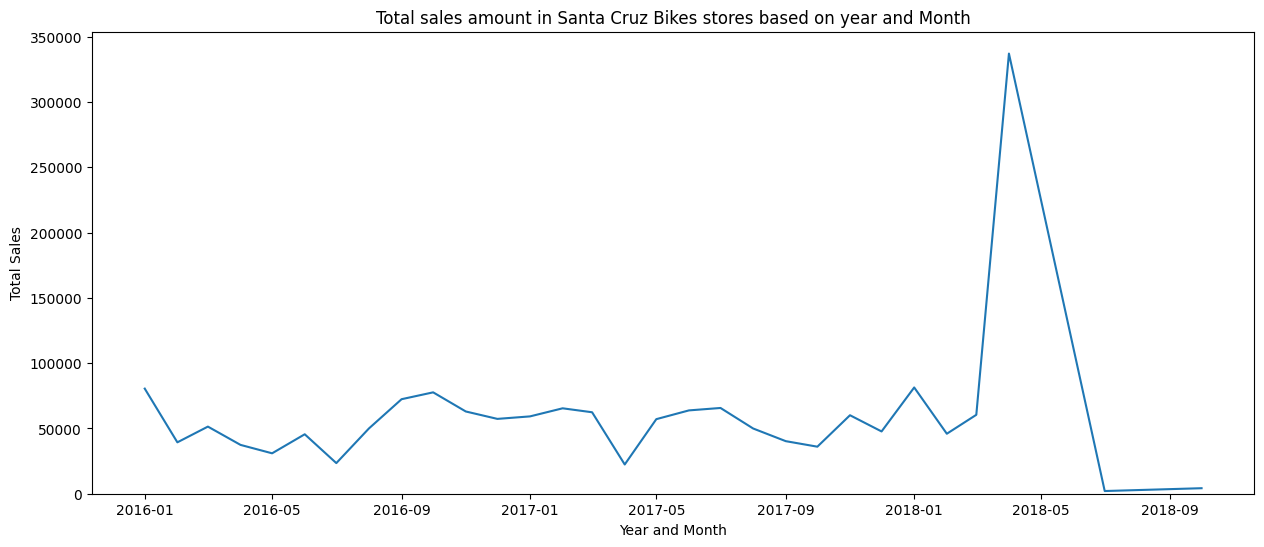

In [ ]:
total_sales_result['Year_Month'] = pd.to_datetime(total_sales_result['Year_Month'], format = '%Y %m')
plt.figure(figsize= (15, 6))
plt.plot(total_sales_result['Year_Month'],total_sales_result['total_sales_amount'])
plt.title("Total sales amount in Santa Cruz Bikes stores based on year and Month")
plt.xlabel("Year and Month")
plt.ylabel("Total Sales")
plt.ylim(bottom = 0)
plt.show()

### **Q: Total sales amount in Baldwin Bikes stores based on year and Month**

In [ ]:
# Alternative
q1 = '''
select
STRFTIME('%Y %m',o.order_date) as Year_Month,
sum((quantity * list_price)-discount) as total_sales_amount
from orders o
join order_items oi on oi.order_id = o.order_id
join stores st on st.store_id = o.store_id
where
lower(st.store_name) like ('%baldwin bikes%')
group by STRFTIME('%Y %m',o.order_date)

'''

total_sales_result = pd.read_sql_query(q1, db)
total_sales_result['Year_Month'] = pd.to_datetime(total_sales_result['Year_Month'], format = '%Y %m')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Line Plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


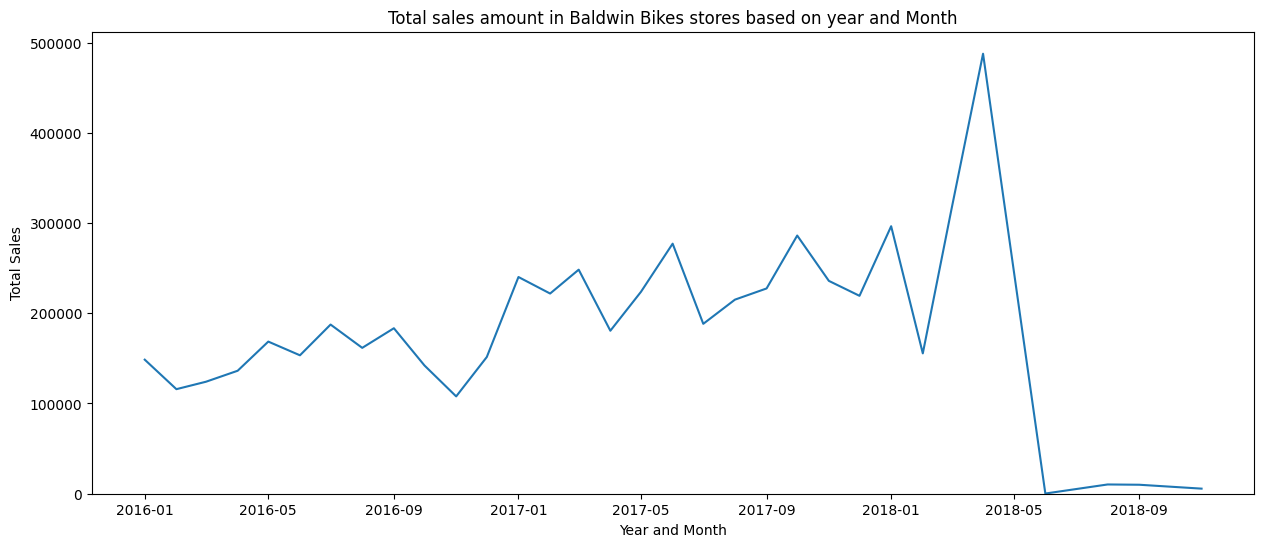

In [ ]:
plt.figure(figsize= (15, 6))
plt.plot(total_sales_result['Year_Month'],total_sales_result['total_sales_amount'])
plt.title("Total sales amount in Baldwin Bikes stores based on year and Month")
plt.xlabel("Year and Month")
plt.ylabel("Total Sales")
plt.ylim(bottom = 0)
plt.show()

### **Q: Staf mana yang memiliki jumlah pesanan terbanyak berdasarkan peringkat**

In [ ]:
q1 = '''
select
s.first_name,
s.last_name,
count(o.order_id) as total_orders
from orders o
join staffs s on o.staff_id = s.staff_id
group by s.first_name
order by total_orders desc
'''
pd.read_sql_query(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,first_name,last_name,total_orders
0,Marcelene,Boyer,553
1,Venita,Daniel,540
2,Genna,Serrano,184
3,Mireya,Copeland,164
4,Kali,Vargas,88
5,Layla,Terrell,86


### **Q: Staf mana yang memiliki jumlah pesanan paling banyak**

In [ ]:
q1 = '''
with staff_orders as (
select
s.first_name,
s.last_name,
count(o.order_id) as total_orders
from orders o
join staffs s on o.staff_id = s.staff_id
group by s.first_name, s.last_name
),
ranked_staff as (
select
*, rank() over (order by total_orders desc) as rank
from
staff_orders
)
select
first_name,
last_name,
total_orders
from
ranked_staff
where rank = 1

'''
pd.read_sql_query(q1, db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,first_name,last_name,total_orders
0,Marcelene,Boyer,553


##Insight data yang bermanfaat untuk pebisnis baru atau pebisnis yang ingin menganalisa performa bisnis mereka

*1. Analisa Penjualan Produk Terbaik di Setiap Kategori*

**Tujuan: Mengidentifikasi produk terbaik (top-selling) dalam setiap kategori untuk membantu pebisnis fokus pada produk unggulan.**

In [ ]:
import pandas as pd
from tabulate import tabulate  # Pastikan Anda menginstalnya dengan `pip install tabulate`

# Query untuk mendapatkan produk terlaris di setiap kategori
query = """
SELECT c.category_name, p.product_name, SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name, p.product_name
ORDER BY c.category_name, total_quantity_sold DESC
"""
df_top_products = pd.read_sql(query, db)

# Menampilkan hasil top-selling product untuk tiap kategori
top_products = df_top_products.groupby('category_name').head(1)  # Mengambil top produk tiap kategori

# Cetak hasil dalam bentuk tabel
print("Produk Terlaris di Setiap Kategori:")
print(tabulate(top_products, headers="keys", tablefmt="pretty"))


Produk Terlaris di Setiap Kategori:
+-----+---------------------+-----------------------------------------------+---------------------+
|     |    category_name    |                 product_name                  | total_quantity_sold |
+-----+---------------------+-----------------------------------------------+---------------------+
|  0  |  Children Bicycles  | Electra Girl's Hawaii 1 (20-inch) - 2015/2016 |         154         |
| 56  |  Comfort Bicycles   |    Electra Townie Original 7D - 2015/2016     |         148         |
| 86  |  Cruisers Bicycles  |      Electra Cruiser 1 (24-Inch) - 2016       |         157         |
| 164 | Cyclocross Bicycles |          Surly Straggler 650b - 2016          |         151         |
| 174 |   Electric Bikes    |             Trek Conduit+ - 2016              |         145         |
| 197 |   Mountain Bikes    |     Surly Ice Cream Truck Frameset - 2016     |         167         |
| 254 |     Road Bikes      |         Trek Domane SLR 6 Disc - 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*2. Analisa Lokasi Toko dengan Penjualan Terbaik*

**Tujuan: Mengidentifikasi lokasi dengan penjualan tertinggi untuk memilih lokasi bisnis baru atau meningkatkan operasional di lokasi tersebut.**

In [ ]:
# Query untuk mendapatkan penjualan total berdasarkan lokasi toko
query = """
SELECT s.city, SUM(oi.quantity * (oi.list_price * (1 - oi.discount))) AS total_sales
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.city
ORDER BY total_sales DESC
"""
df_sales_by_city = pd.read_sql(query, db)

# Menampilkan hasil lokasi dengan penjualan tertinggi
print("Lokasi Toko dengan Penjualan Tertinggi:")
print(df_sales_by_city)


Lokasi Toko dengan Penjualan Tertinggi:
         city   total_sales
0     Baldwin  5.215751e+06
1  Santa Cruz  1.605823e+06
2     Rowlett  8.675422e+05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*3. Analisa Stok Produk yang Hampir Habis*

**Tujuan: Mengidentifikasi produk dengan stok rendah untuk memastikan ketersediaan barang dan menghindari out-of-stock.**

In [ ]:
import pandas as pd
from tabulate import tabulate  # Pastikan Anda menginstalnya dengan `pip install tabulate`

# Query untuk mendapatkan produk dengan stok rendah
query = """
SELECT p.product_name, c.category_name, s.store_name, st.quantity AS stock_left
FROM stocks st
JOIN products p ON st.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
JOIN stores s ON st.store_id = s.store_id
WHERE st.quantity < 10
ORDER BY stock_left ASC
"""
df_low_stock = pd.read_sql(query, db)

# Menampilkan produk dengan stok rendah dalam bentuk tabel
print("Produk dengan Stok Rendah:")
print(tabulate(df_low_stock, headers="keys", tablefmt="pretty"))


Produk dengan Stok Rendah:
+-----+-------------------------------------------------------+---------------------+------------------+------------+
|     |                     product_name                      |    category_name    |    store_name    | stock_left |
+-----+-------------------------------------------------------+---------------------+------------------+------------+
|  0  |         Surly Ice Cream Truck Frameset - 2016         |   Mountain Bikes    | Santa Cruz Bikes |     0      |
|  1  |         Trek Remedy 29 Carbon Frameset - 2016         |   Mountain Bikes    | Santa Cruz Bikes |     0      |
|  2  |           Trek Farley Alloy Frameset - 2017           |   Mountain Bikes    | Santa Cruz Bikes |     0      |
|  3  |            Trek Fuel EX 5 27.5 Plus - 2017            |   Mountain Bikes    | Santa Cruz Bikes |     0      |
|  4  |                Haro Shredder 20 - 2017                |  Children Bicycles  | Santa Cruz Bikes |     0      |
|  5  |               Trek Em

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
